# Week 2

In [52]:
from Algs_scratch import *

In [53]:
def func_x(x):
    return - x**5 - 2*x + 1

In [54]:
%%time
bisection(-2, 2, func_x)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [55]:
%%time
secant_method(func_x, 0, 0.2)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.4 µs


(0.486389035934543, 6)

In [56]:
%%time
Newton_Raphson(func_x, 0.2)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 12.4 µs


(0.4863890252475381, 8)

# Week 3

## bruteforce or scipy.optimize

In [57]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize


In [58]:
def f(x):
    return x**6 - x**5 + x**4 - 7*x**3 + x**2 + x -5

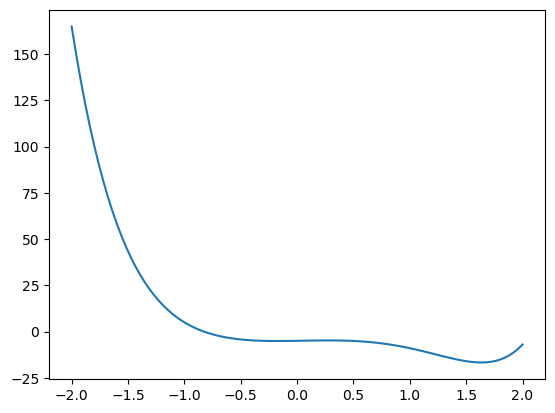

In [59]:
def matplotlib_display():
    import matplotlib.pyplot as plt 
    x = np.linspace(-2, 2, 100)
    plt.plot(x, f(x))
    plt.show()
matplotlib_display()

In [60]:
minfx = minimize(f, 0, method='BFGS', options={'disp': True})
minimizescalar = opt.minimize_scalar(f, method='brent')
print(minfx)


Optimization terminated successfully.
         Current function value: -5.105749
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 7
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.105749483553248
        x: [-1.729e-01]
      nit: 5
      jac: [-5.960e-08]
 hess_inv: [[ 1.024e-01]]
     nfev: 14
     njev: 7


In [61]:
%%time
def df(x):
    return 6*x**5 - 5*x**4 + 4*x**3 - 21*x**2 + 2*x + 1
    
minfx = opt.root_scalar(df, method='newton', x0=1.4)
print(f"""
    Newton-Raphson: 
    {minfx}
    """)


    Newton-Raphson: 
          converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 1.6351292084233693
    
CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.38 ms


In [62]:
def get_derivative_f(x, func, tol=1e-6):
    return (func(x + tol) - func(x-tol)) / (2*tol)

In [63]:
%%time
def BruteForce(func, range, steps, tol=1e-6):
    x = np.linspace(range[0], range[1], steps)
    y = func(x)
    min_index = np.argmin(y)
    max_index = np.argmax(y)
    x_min = x[min_index]
    x_max = x[max_index]
    return {
        'min': {
            'x': x_min,
            'y': y[min_index]
        },
        'max': {
            'x': x_max,
            'y': y[max_index]
        }
    }

BruteForce(f, [-10,10], 1000)

CPU times: user 547 µs, sys: 41 µs, total: 588 µs
Wall time: 379 µs


{'min': {'x': 1.631631631631631, 'y': -16.720848456833032},
 'max': {'x': -10.0, 'y': 1117085.0}}

## x = [x1,x2]

$$
x \in \left[ 0, 1 \right]^2
$$

In [64]:
A = np.random.rand(2,2)
C = np.random.rand(2,1)
D = np.random.rand(1,1)
print(A)
print(C)
print(D)
X = np.random.rand(2,1)

[[0.05092033 0.37078771]
 [0.11534957 0.70131252]]
[[0.90822185]
 [0.50304592]]
[[0.19063603]]


In [65]:
def f(x):
    return x.T @ A @ x + C.T @ x + D

def test():
    x=np.random.rand(2,1)
    return x, f(x)

def df(x, tol=1e-6):
    return ((f(x + tol) - f(x-tol)) / (2*tol))
df(X).shape

(1, 1)

In [66]:
import scipy.misc as misc
misc.derivative(f, X)

/tmp/ipykernel_52506/432769170.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(f, X)


array([[2.84449344]])

In [67]:
minfx = opt.minimize(f, X.reshape(-1), method='BFGS', options={'disp': True})

         Current function value: -1450916.077868
         Iterations: 4
         Function evaluations: 360
         Gradient evaluations: 116


/home/lap05/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


# Week4

## find f'

In [68]:
n = np.random.randint(1, 10)
n


6

In [69]:
params = np.random.rand(n)
params

array([0.2618653 , 0.35391728, 0.82142443, 0.36092213, 0.66290166,
       0.97340784])

In [70]:
coordinates = []
for i in range(n):
    x = np.random.randint(0,10) 
    y = np.random.randint(0,10)
    coordinates.append((x,y))
coordinates = np.array(coordinates)
coordinates

array([[3, 5],
       [2, 5],
       [4, 0],
       [6, 4],
       [8, 9],
       [8, 9]])

[  0.26381842 -15.02108367  20.76070409  -8.35830181   1.29953804
  -0.06845818]


/home/lap05/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


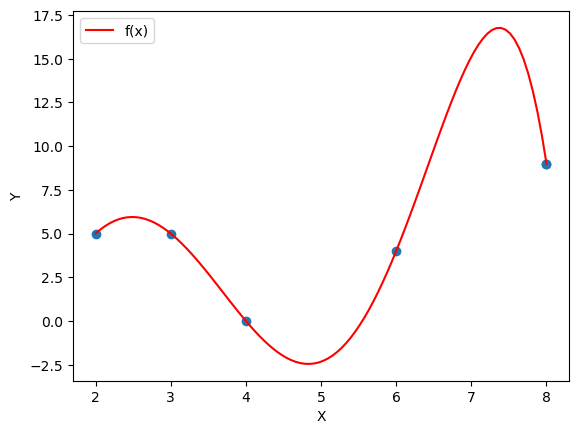

In [71]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = coordinates[:, 0]
y = coordinates[:, 1]

def target_function(x, *params):
    # result_f = 0
    # for i in range(len(params)):
    #     result_f += params[i] * x**i
    return sum([params[i] * x**i for i in range(len(params))])

fit_params, pcov = curve_fit(target_function, x, y, p0=params.tolist())
print(fit_params)

x_new = np.linspace(min(x), max(x), 100)

y_new = target_function(x_new, *fit_params)    # Create an coordinate


plt.scatter(x, y)
plt.plot(x_new, y_new, label='f(x)', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [72]:
def df(x, tol = 1e-6):
    return ((target_function((x + tol), *fit_params) - target_function((x-tol), *fit_params)) / (2*tol))

In [73]:
df(1)

6.281280365838526

## Homework

ktra co phai toi uu loi khong (Check is convex)
sd phuong phap roi rac hoa de giai
$$
    f_i(x_i) = x_i.\log_2{(1+\frac{a_i}{x_i})} + \frac{1}{r_i}.\log_2{(1 + b_i.x_i)}
$$

In [74]:
import numpy as np
from scipy.optimize import minimize

def f(x, a, r, b):
    return x*np.log2(a/x) + (1/r)*np.log2(1 + b*x)

def df(x, a, r, b, tol=1e-6):
    return ((f(x + tol, a, r, b) - f(x-tol, a, r, b)) / (2*tol))

def df2(x, a, r, b, tol=1e-6):
    return ((df(x + tol, a, r, b) - df(x-tol, a, r, b)) / (2*tol))

def neg_f(x, a, r, b):
    return -f(x, a, r, b)

def is_convex(x, a, r, b):
    if df2(x, a, r, b) < 0:
        return "concave"
    elif df2(x, a, r, b) <= 0 and df(x, a, r, b) >= 0:
        return "undetermined"
    else:
        return "convex"
    
a = np.random.rand()
r = np.random.rand()
b = np.random.rand()

x0 = np.random.rand()
x0


0.7631060313566813

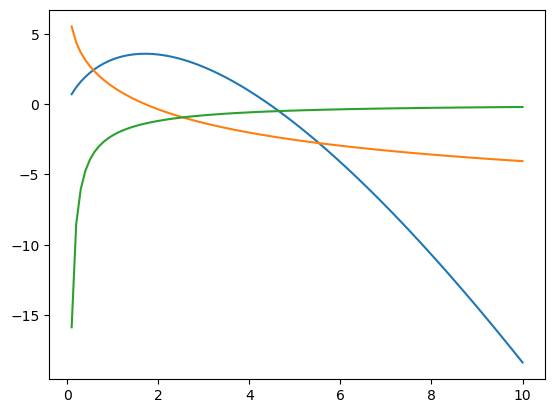

In [75]:
def visualize():
    import matplotlib.pyplot as plt
    x = np.linspace(0.1, 10, 100)
    plt.plot(x, f(x, a, r, b))
    plt.plot(x, df(x, a, r, b))
    plt.plot(x, df2(x, a, r, b))
    plt.show()
visualize()

In [76]:
minfx = minimize(neg_f, x0, args=(a, r, b), method='BFGS', options={'disp': True})
minfx

Optimization terminated successfully.
         Current function value: -3.575322
         Iterations: 4
         Function evaluations: 10
         Gradient evaluations: 5


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -3.5753215913078114
        x: [ 1.712e+00]
      nit: 4
      jac: [ 1.669e-06]
 hess_inv: [[ 7.263e-01]]
     nfev: 10
     njev: 5